In [1]:
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error
import keras
from numpy import array
from keras.models import Sequential
from keras.layers import Dense , Dropout

Using TensorFlow backend.


In [2]:
df = pd.read_excel(r'C:\Users\u22v09\Desktop\Data_7_14.xlsx')
df = df.rename(columns = {'Unnamed: 0':'time'}).set_index('time')
df.index.freq = 'H'

In [3]:
df[df['EM4'] < 0] = 0

In [4]:
df.shape

(721, 1)

In [5]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()

In [6]:
df1=df.copy()

In [7]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

raw_seq = list(df['EM4'].values)
n_steps = 15
X, y = split_sequence(raw_seq, n_steps = n_steps)

In [8]:
t =[]
x =[]
for i in range(len(X)):
    t.append(X[i])
    x.append(y[i])
inp = pd.DataFrame(t)
out = pd.DataFrame(x)
out = out.rename(columns= {0:'out'})

In [9]:
df = inp.merge(out, left_index = True, right_index = True)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,out
0,26.0,111.0,120.0,27.0,109.0,30.0,7.0,24.0,13.5,3.0,29.0,22.0,15.0,8.0,23.0,53.0
1,111.0,120.0,27.0,109.0,30.0,7.0,24.0,13.5,3.0,29.0,22.0,15.0,8.0,23.0,53.0,83.0
2,120.0,27.0,109.0,30.0,7.0,24.0,13.5,3.0,29.0,22.0,15.0,8.0,23.0,53.0,83.0,113.0
3,27.0,109.0,30.0,7.0,24.0,13.5,3.0,29.0,22.0,15.0,8.0,23.0,53.0,83.0,113.0,143.0
4,109.0,30.0,7.0,24.0,13.5,3.0,29.0,22.0,15.0,8.0,23.0,53.0,83.0,113.0,143.0,173.0


In [11]:
tr = int(round(len(df)*0.7, 0))
train = df[:tr]
test = df[tr:]

In [12]:
import warnings
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Dense(200, activation='relu', input_dim=n_steps))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit((train.drop('out', axis = 1)).values, train['out'], epochs=200, verbose=0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



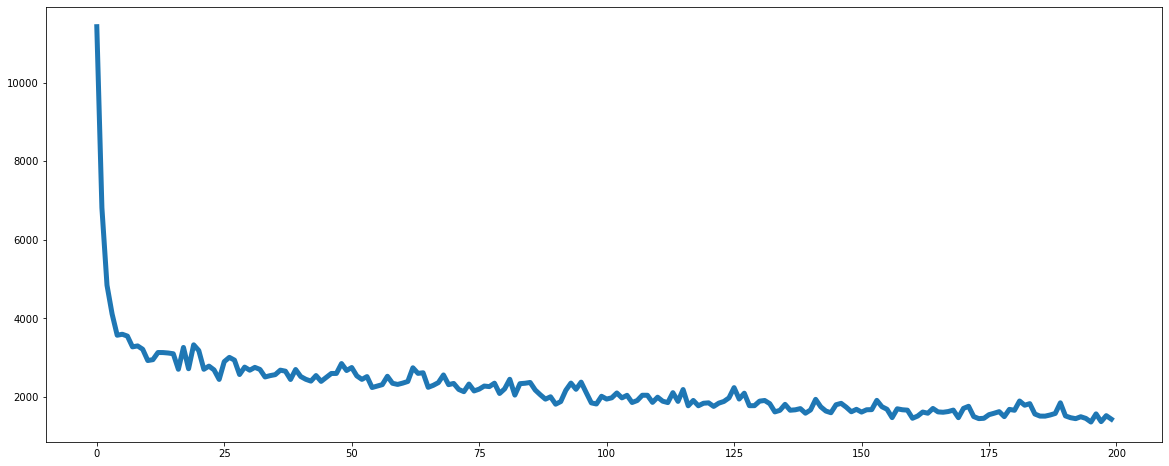

In [13]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['lines.linewidth'] = 5
plt.plot(epochs, loss)

In [14]:
x_input = array(test.drop('out', axis = 1).values)
yhat = model.predict(x_input, verbose=0)

In [15]:
pred = pd.DataFrame(yhat, index = test.index)
pred = pred.rename(columns= {0:'Pred'})
pred['True']=test['out'].values
pred.head()

,Pred,True
494,160.011429,177.0
495,119.606766,190.0
496,158.443466,144.0
497,142.515976,152.0
498,134.542313,160.0


In [16]:
import math
math.sqrt(mean_squared_error(pred['Pred'],pred['True']))

56.41192472221627

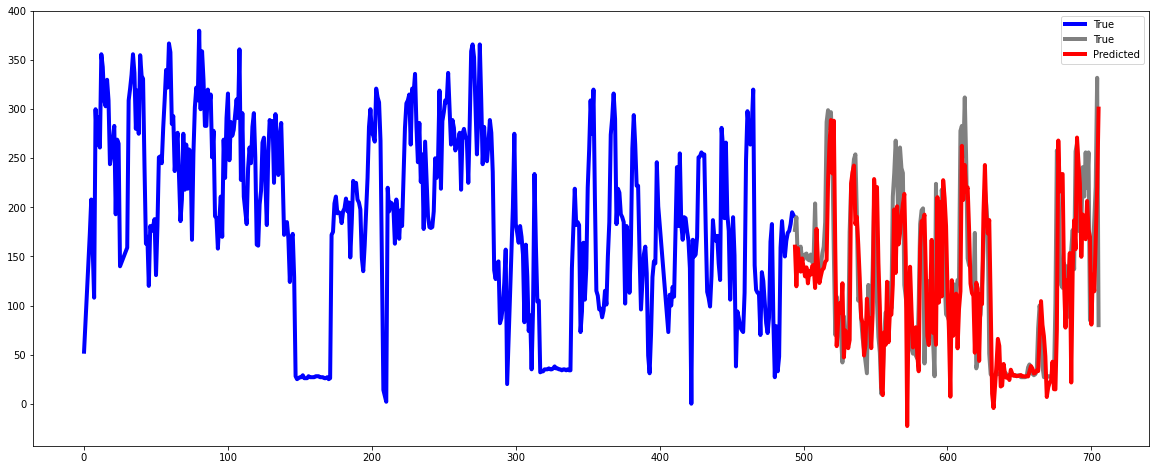

In [17]:
plt.figure(figsize=(20,8))
plt.plot(train['out'], label='True', lw = 4, color = 'blue')
plt.plot(pred['True'], label='True', lw = 4, color = 'grey')
plt.plot(pred['Pred'], label='Predicted', lw = 4, color = 'red')
plt.legend(loc='best')
plt.show()

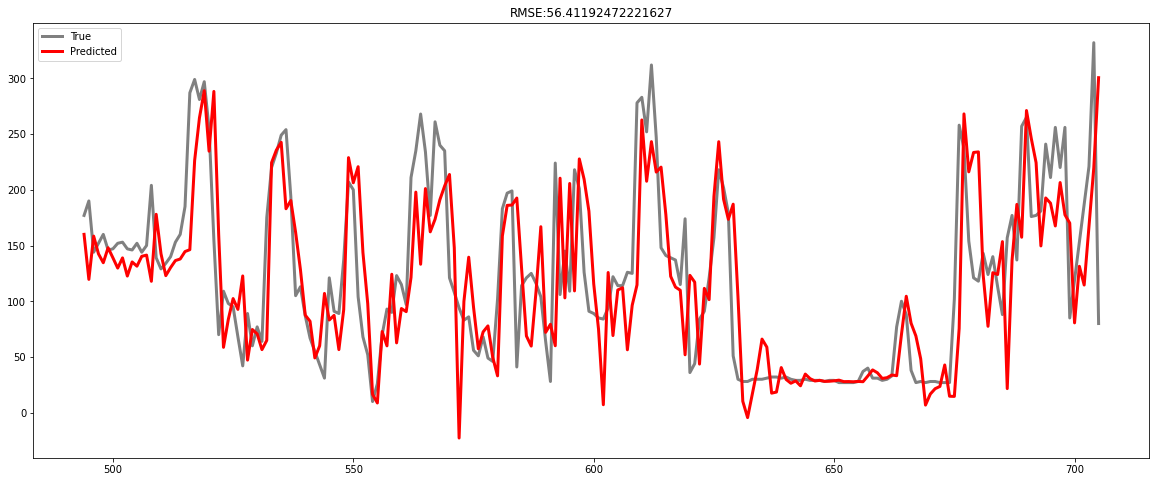

In [18]:
rmse = math.sqrt(mean_squared_error(pred['Pred'],pred['True']))
plt.figure(figsize=(20,8))
plt.title('RMSE:{}'.format(rmse))
plt.rcParams['axes.titlesize'] = 10
plt.plot(pred['True'], label='True', lw = 3, color = 'grey')
plt.plot(pred['Pred'], label='Predicted', lw = 3, color = 'red')
plt.legend(loc='best')
plt.show()

In [19]:
# X_train,y_train= train.drop('out', axis = 1),train[['out']]
# X_valid,y_valid= test.drop('out', axis = 1), test[['out']]

In [20]:
# X_valid.shape

In [21]:
# y_valid.shape

In [22]:
# from keras.layers.convolutional import Conv1D, MaxPooling1D,Conv2D
# from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

In [23]:
# X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))

In [24]:
# model_cnn = Sequential()
# model_cnn.add(Conv2D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
# model_cnn.add(MaxPooling1D(pool_size=2))
# model_cnn.add(Flatten())
# model_cnn.add(Dense(50, activation='relu'))
# model_cnn.add(Dense(1))
# model_cnn.compile(loss='mse', optimizer='adam')
# model_cnn.fit(X_train_series, y_train, validation_data=(X_valid_series, y_valid), epochs=500, verbose=2)

In [25]:
# x_input = (y_valid_series.values)
# yhat = model_cnn.predict(x_input, verbose=0)

In [26]:
# array(pd.DataFrame(y_valid_series[0]))

In [27]:
# x_input = array(test.drop('out', axis = 1).values)
# yhat = model_cnn.predict(x_input, verbose=0)

In [28]:
# ############ multi-step data preparation
# from numpy import array
 
# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps_in, n_steps_out):
#     X, y = list(), list()
#     for i in range(len(sequence)):
#         # find the end of this pattern
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out
#         # check if we are beyond the sequence
#         if out_end_ix > len(sequence):
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)
 
# # define input sequence
# raw_seq = list(df1['EM4'].values)
# # choose a number of time steps
# n_steps_in, n_steps_out = 20,2
# # split into samples
# X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# # summarize the data
# for i in range(len(X)):
#     print(X[i], y[i])

In [29]:
# t =[]
# x =[]
# for i in range(len(X)):
#     t.append(X[i])
#     x.append(y[i])
# inp = pd.DataFrame(t)
# out = pd.DataFrame(x)
# out = out.rename(columns= {0:'out1',1:'out2'})

In [30]:
# df2 = inp.merge(out, left_index = True, right_index = True)

In [31]:
# df2.head()